In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Sebességmérés Optikai Keveréssel
> A jelgenerátort beállítottuk $f=20~$Hz frekvenciára és $V_{pp}=190~$mV amplitúdóra, szinuszos jelalakkal. A jellel a hangszórót hajtottuk meg, melyre az interferométer összeállításban az egyik tükör volt erősítve.
> Az oszcilloszkópon figyeltük a kiadott jelet és az interferométerből, mint heterodin keverőből visszaérkező jelet. Ezen a jelen a kiadott jel egy zérushelyétől ($t_0$) kezdődően mértük a zérushelyeket ($t_i=t-t_0$), melyből visszaszámoltuk a zérushelyek között eltelt időket: $\Delta \tau_i=t_{i+1}-t_i$. Ezekből meghatároztuk a pillanatnyi frekvenciákat:
$$f_i\approx \frac{1}{2\cdot\Delta\tau_i}$$
és sebességeket:
$$|v|\approx\frac{\lambda f_i}{2}.$$

[5.67789646e-04 1.20732950e+02]
[[ 1.50993135e-11 -2.24123144e-07]
 [-2.24123144e-07  9.57090422e-02]]


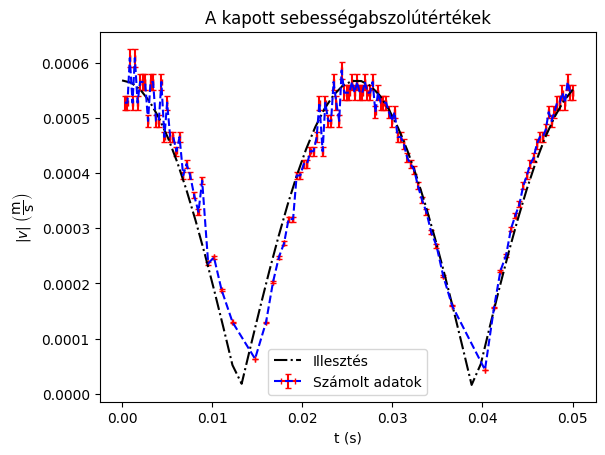

In [2]:
lam = 632.8e-9
dt = np.array([0, 300e-6, 600e-6, 860e-6, 1.16e-3, 1.42e-3, 1.72e-3, 2e-3, 2.28e-3, 2.56e-3, 2.88e-3, 3.16e-3, 3.44e-3, 3.76e-3, 4.08e-3, 4.36e-3, 4.70e-3, 5.00e-3, 5.34e-3, 5.68e-3, 6.04e-3, 6.38e-3, 6.78e-3, 7.16e-3, 7.56e-3, 8e-3, 8.48e-3, 8.89e-3, 9.56e-3, 10.2e-3, 11.04e-3, 12.26e-3, 14.76e-3, 15.98e-3, 16.76e-3, 17.4e-3, 17.98e-3, 18.48e-3, 18.98e-3, 19.38e-3, 19.78e-3, 20.16e-3, 20.54e-3, 20.9e-3, 21.26e-3, 21.6e-3, 21.9e-3, 22.26e-3, 22.56e-3, 22.88e-3, 23.20e-3, 23.48e-3, 23.78e-3, 24.1e-3, 24.37e-3, 24.66e-3, 24.95e-3, 25.24e-3, 25.52e-3, 25.81e-3, 26.09e-3, 26.38e-3, 26.67e-3, 26.95e-3, 27.24e-3, 27.53e-3, 27.81e-3, 28.12e-3, 28.41e-3, 28.71e-3, 29.01e-3, 29.31e-3, 29.62e-3, 29.94e-3, 30.25e-3, 30.59e-3, 30.93e-3, 31.28e-3, 31.65e-3, 32.03e-3, 32.42e-3, 32.84e-3, 33.29e-3, 33.77e-3, 34.31e-3, 34.9e-3, 35.64e-3, 36.63e-3, 40.28e-3, 41.29e-3, 42e-3, 42.63e-3, 43.16e-3, 43.65e-3, 44.11e-3, 44.53e-3, 44.93e-3, 45.31e-3, 45.68e-3, 46.03e-3, 46.37e-3, 46.71e-3, 47.04e-3, 47.35e-3, 47.67e-3, 47.98e-3, 48.28e-3, 48.58e-3, 48.87e-3, 49.17e-3, 49.45e-3, 49.74e-3, 50.03e-3])
dif = np.diff(dt)
fabs = 1/(2*dif)
vabs = fabs*lam/2

sf = 1/(2*dif**2)*14e-6
sv = vabs/2*np.sqrt((1/632.8)**2+(sf/fabs)**2)

f = lambda t, a, b: a*np.abs(np.cos(b*t))
[fit, cov] = curve_fit(f, xdata=dt[1:], ydata=vabs, p0=(0.0006, 125))
print(fit)
print(cov)

fig, ax = plt.subplots()
ax.errorbar(dt[1:], vabs, xerr=20e-6, yerr=sv, fmt='b--', ecolor='r', capsize=2, label='Számolt adatok')
ax.plot(np.linspace(0, dt[-1]), f(np.linspace(0, dt[-1]), fit[0], fit[1]),'k-.' , label='Illesztés')
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'$|v|$ $\left(\mathrm{\dfrac{m}{s}}\right)$')
ax.set_title('A kapott sebességabszolútértékek')
ax.legend()
plt.savefig('1vabs'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

# Membrán Amplitúdójának Mérése
A hangszóró membránjának amplitúdóját mértük a frekvencia függvényében $20~$Hz és $500~$Hz között.

In [3]:
f = np.append(np.arange(20, 200, 10), np.arange(200, 501, 50))
a = np.array([57*2, 59*2, 65*2-1, 73*2, 164, 199, 195, 225, 194, 143, 107, 87, 70, 56, 23*2, 20*2, 17*2, 15*2+1, 13*2, 15*2, 20, 14, 12, 8, 6], dtype=int) # +-2

    f (Hz)    N       x_0 (m)
0       20  114  4.508700e-06
1       30  118  4.666900e-06
2       40  129  5.101950e-06
3       50  146  5.774300e-06
4       60  164  6.486200e-06
5       70  199  7.870450e-06
6       80  195  7.712250e-06
7       90  225  8.898750e-06
8      100  194  7.672700e-06
9      110  143  5.655650e-06
10     120  107  4.231850e-06
11     130   87  3.440850e-06
12     140   70  2.768500e-06
13     150   56  2.214800e-06
14     160   46  1.819300e-06
15     170   40  1.582000e-06
16     180   34  1.344700e-06
17     190   31  1.226050e-06
18     200   26  1.028300e-06
19     250   30  1.186500e-06
20     300   20  7.910000e-07
21     350   14  5.537000e-07
22     400   12  4.746000e-07
23     450    8  3.164000e-07
24     500    6  2.373000e-07
[1.43617671e+00 5.79014583e+02 2.54384631e-01]
[[1.71363631e-03 1.27571764e-01 3.10843059e-04]
 [1.27571764e-01 2.47481798e+01 1.19753782e-02]
 [3.10843059e-04 1.19753782e-02 8.84819077e-05]]


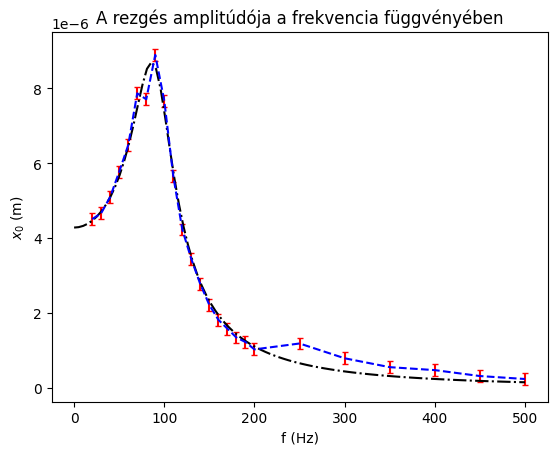

In [7]:
def count_zeros(arr, mean):
    count = 0
    for i in range(len(arr)-1):
        if arr[i] < mean <= arr[i + 1]:
            count+=1
        elif arr[i] > mean >= arr[i+1]:
            count+=1

    return count

c = []
for fr in f:
    string = 'scope_'+str(fr)+'.csv'
    try:
        data = pd.read_csv(string, skiprows=3).to_numpy()
        data = data[:-1]
        cou = count_zeros(data[:,1], data[:,1].mean())
        cou = cou/((data[:,0].max()-data[:,0].min())*fr)
        c.append(cou)
    except Exception:
        c.append(-1)

x0 = a*lam/16
data = pd.DataFrame({'f (Hz)': f, 'N': a, 'x_0 (m)': x0})
#print(data.to_latex(column_format='c|cc', decimal=',', float_format="$%.9f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))
print(data)
#print(x0*np.sqrt((1/632.8)**2+(4/a)**2))

res = lambda t, a, b, c: a/np.sqrt((4*np.pi*t*b*c)**2+(b**2-(2*np.pi*t)**2)**2)
[fit, cov] = curve_fit(res, xdata=f, ydata=x0, p0=(1, 90*2*np.pi, 0.01))

print(fit)
print(cov)

fig, ax = plt.subplots()
ax.errorbar(f, x0, yerr=x0*np.sqrt((1/632.8)**2+(4/a)**2), fmt='b--', ecolor='r', capsize=2, label=r'Számolt $x_0$-k')
ax.plot(np.linspace(0, f[-1], 100), res(np.linspace(0, f[-1], 100), fit[0], fit[1], fit[2]), 'k-.', label='Illesztés')
ax.set_xlabel('f (Hz)')
ax.set_ylabel(r'$x_0$ (m)')
ax.set_title('A rezgés amplitúdója a frekvencia függvényében')
plt.savefig('2res'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

# Egyenletesen Mozgó Tükör Sebessége


   U (V)  v (cm/s)
0    2.5  0.041667
1    3.0  0.057471
2    3.5  0.075758


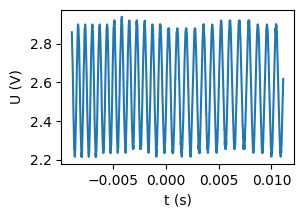

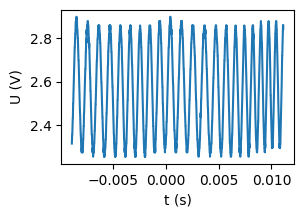

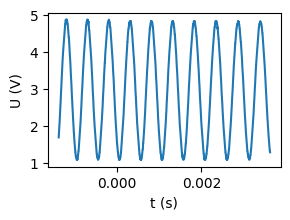

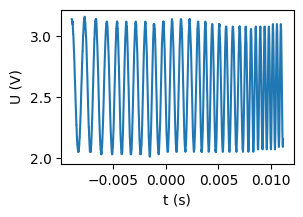

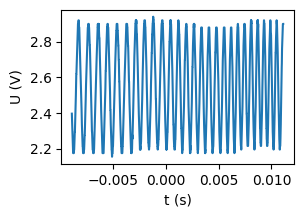

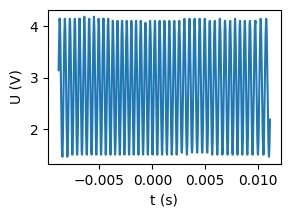

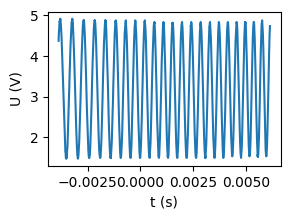

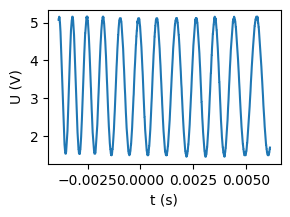

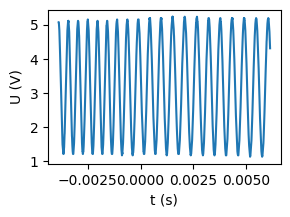

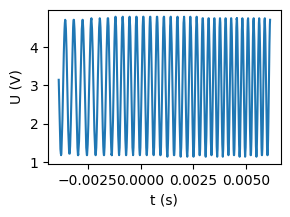

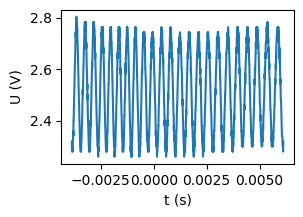

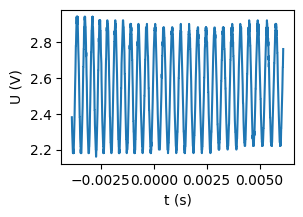

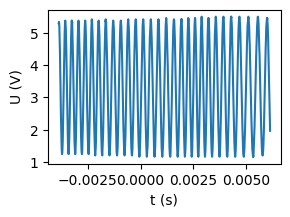

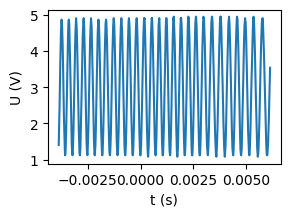

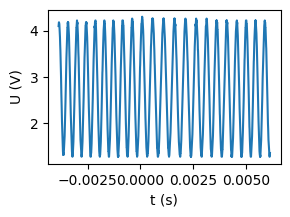

In [5]:
fesz = np.array([2.5, 3, 3.5]) # V
cm1 = np.array([24, 17.4, 13.2]) # s

print(pd.DataFrame({'U (V)': fesz, 'v (cm/s)': 1/cm1}))

names = ["25k1", "25k2", "25t1", "25t2", "25t3", "3k1", "3k2", "3t1", "3t2", "3t3", "35k1", "35k2", "35t1", "35t2", "35t3"]
data = []
for name in names:
    name = 'scope_'+name+'.csv'
    vmi=pd.read_csv(name, skiprows=2).to_numpy()
    data.append(vmi)
    fig,ax=plt.subplots(figsize=(3,2))
    ax.plot(vmi[:,0],vmi[:,1])
    plt.xlabel('t (s)')
    plt.ylabel('U (V)')
    plt.show()

#plt.plot(data[1][:,0],data[1][:,1])
#plt.show()
omega0=2*1/cm1*1e-2*2*np.pi/lam

#[param,cov]=curve_fit(lambda t, b: a*np.sin(b*t)+2.55,xdata=data[1][:,0],ydata=data[1][:,1],p0=[omega0[0]])
#plt.plot(data[1][:,0], 0.35*np.sin(param[0]*data[1][:,0])+2.55)
#plt.show()